# NAME - DHANYA SRIVASTAVA
## BATCH - DS2304
# Project Description


This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV.

The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados.

Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags.

The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

# Some relevant columns in the dataset:
Date - The date of the observation

AveragePrice - the average price of a single avocado

type - conventional or organic

year - the year

Region - the city or region of the observation

Total Volume - Total number of avocados sold

4046 - Total number of avocados with PLU 4046 sold

4225 - Total number of avocados with PLU 4225 sold

4770 - Total number of avocados with PLU 4770 sold

# Inspiration /Label
The dataset can be seen in two angles to find the region and find the average price .

Task: One of Classification and other of Regression

Do both tasks in the same .ipynb file and submit at single file.

# Downlaod Files:
https://github.com/dsrscientist/Data-Science-ML-Capstone-Projects/blob/master/avocado.csv.zip

In [1]:
# IMPORTING NECESSARY LIBRARIES


import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import warnings
warnings.filterwarnings ('ignore')

In [2]:
 # IMPORTING DATA

df = pd.read_csv(r"C:/Users/Lenovo/Downloads/avocado.csv (1).zip")



In [3]:
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [4]:
df["Date"]= pd.to_datetime(df["Date"])
df['month'] = pd.DatetimeIndex(df['Date']).month
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,month
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11


In [5]:
# Drop Unnamed Column 

df2=df.drop(['Unnamed: 0','Date',],axis=1)

In [6]:
df2.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,month
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11


In [7]:
#  checking  data type of each column 

df2.dtypes

AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
month             int64
dtype: object

In [8]:
# Checking Null Values in DataFrame
df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
month           0
dtype: int64

In [9]:
# check  the duplicate

duplicate = df[df.duplicated()]


In [10]:
print("Duplicate Rows :")

duplicate

Duplicate Rows :


,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,month


In [11]:
df2.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,month
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899,6.177215
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938,3.534130
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000,1.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000,3.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000,6.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000,9.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000,12.000000


# Performing EDA

In [12]:
def EDA(col): # function to plot the graphs
    print(col)
    print(df2[col].describe())
    print('\n')
    plt.plot()
    sns.distplot(df2[col]) #distrubution plot to check the skewness
    plt.show()
    print('\n')
    plt.plot()
    df2[col].hist(grid=True) # Histgram to check the scale 
    plt.show()
    print('\n')
    plt.plot()
    sns.boxplot(df2[col]) # for the outliers
    plt.show()


Total Volume
count    1.824900e+04
mean     8.506440e+05
std      3.453545e+06
min      8.456000e+01
25%      1.083858e+04
50%      1.073768e+05
75%      4.329623e+05
max      6.250565e+07
Name: Total Volume, dtype: float64




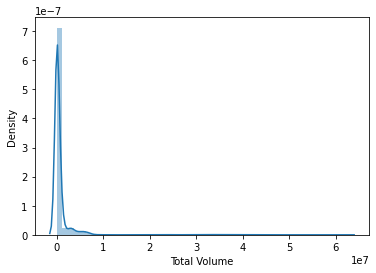

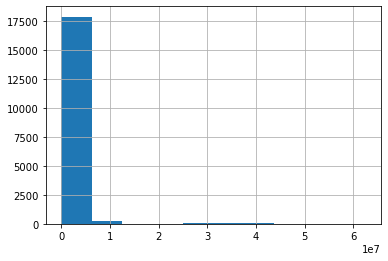

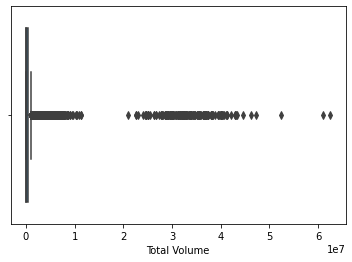

In [13]:
EDA('Total Volume')

4225
count    1.824900e+04
mean     2.951546e+05
std      1.204120e+06
min      0.000000e+00
25%      3.008780e+03
50%      2.906102e+04
75%      1.502069e+05
max      2.047057e+07
Name: 4225, dtype: float64




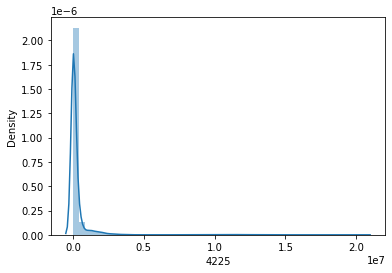

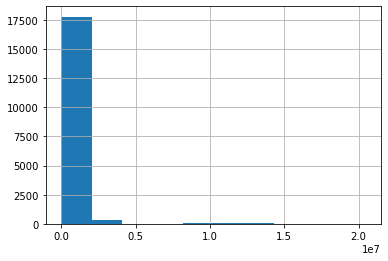

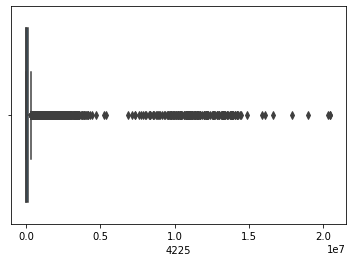

In [14]:
EDA('4225')

4770
count    1.824900e+04
mean     2.283974e+04
std      1.074641e+05
min      0.000000e+00
25%      0.000000e+00
50%      1.849900e+02
75%      6.243420e+03
max      2.546439e+06
Name: 4770, dtype: float64




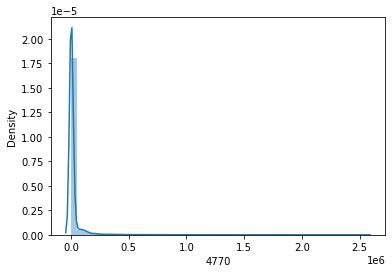

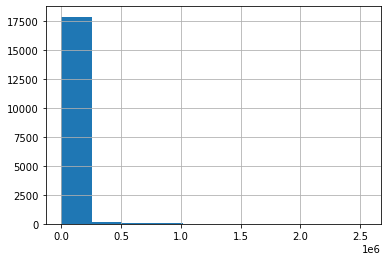

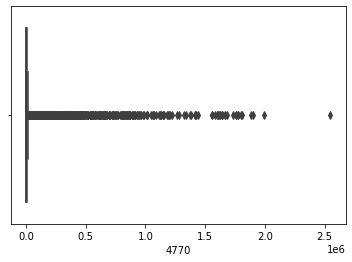

In [15]:
EDA('4770')

Total Bags
count    1.824900e+04
mean     2.396392e+05
std      9.862424e+05
min      0.000000e+00
25%      5.088640e+03
50%      3.974383e+04
75%      1.107834e+05
max      1.937313e+07
Name: Total Bags, dtype: float64




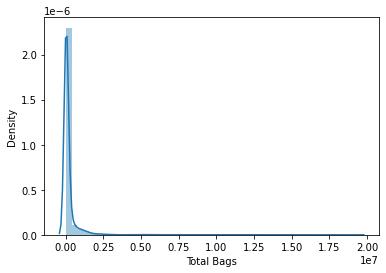

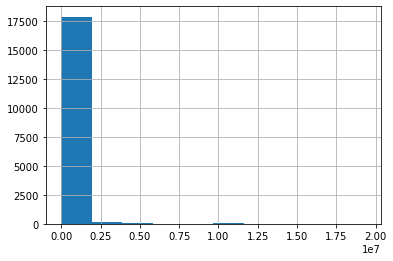

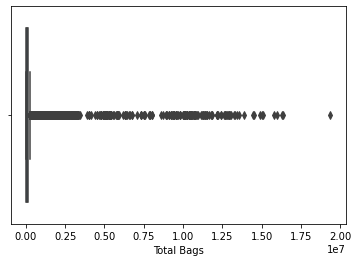

In [16]:
EDA('Total Bags')

Small Bags
count    1.824900e+04
mean     1.821947e+05
std      7.461785e+05
min      0.000000e+00
25%      2.849420e+03
50%      2.636282e+04
75%      8.333767e+04
max      1.338459e+07
Name: Small Bags, dtype: float64




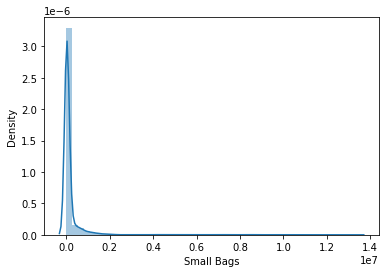

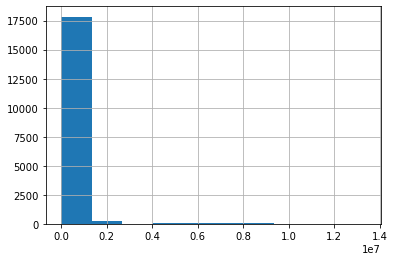

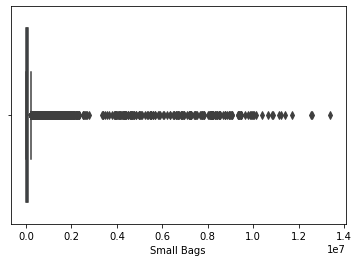

In [17]:
EDA('Small Bags')

Large Bags
count    1.824900e+04
mean     5.433809e+04
std      2.439660e+05
min      0.000000e+00
25%      1.274700e+02
50%      2.647710e+03
75%      2.202925e+04
max      5.719097e+06
Name: Large Bags, dtype: float64




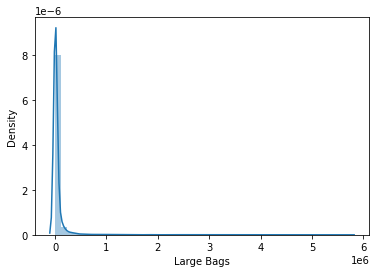

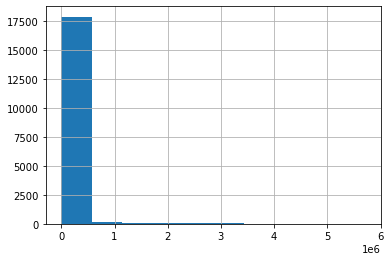

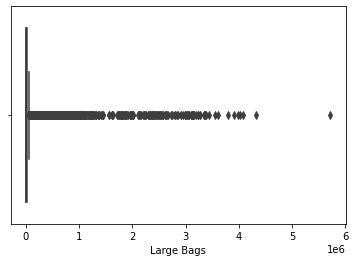

In [18]:
EDA('Large Bags')

XLarge Bags
count     18249.000000
mean       3106.426507
std       17692.894652
min           0.000000
25%           0.000000
50%           0.000000
75%         132.500000
max      551693.650000
Name: XLarge Bags, dtype: float64




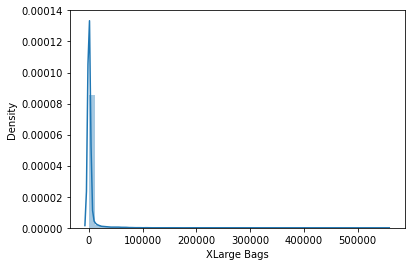

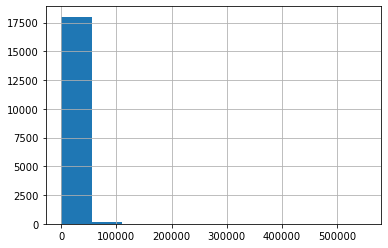

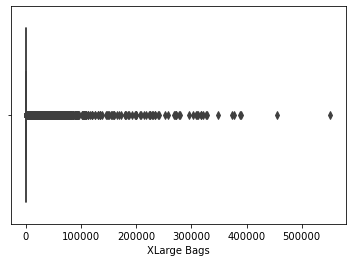

In [19]:
EDA('XLarge Bags')

year
count    18249.000000
mean      2016.147899
std          0.939938
min       2015.000000
25%       2015.000000
50%       2016.000000
75%       2017.000000
max       2018.000000
Name: year, dtype: float64




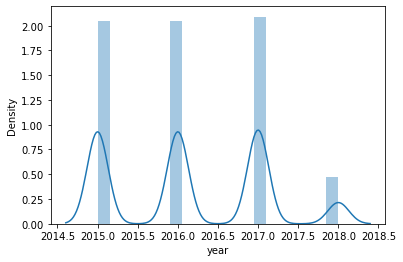

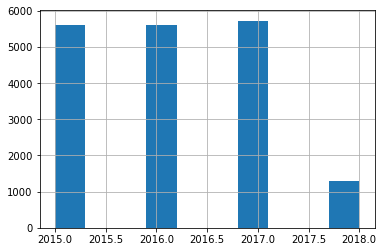

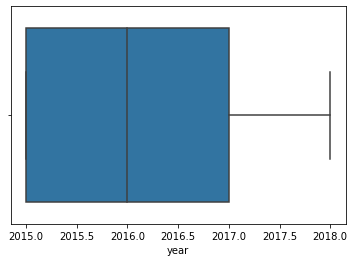

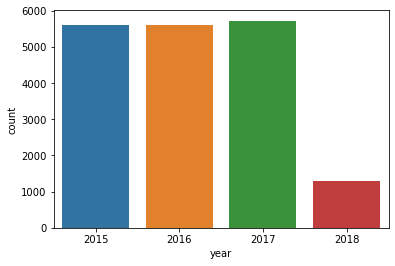

In [20]:
EDA('year')

sns.countplot(x ='year', data = df)
 
plt.show()

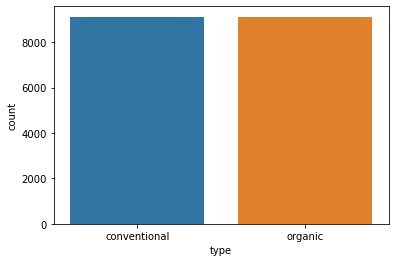

In [21]:
sns.countplot(x ='type', data = df)
 

plt.show()

[Text(0, 0, 'Albany'),
 Text(1, 0, 'Atlanta'),
 Text(2, 0, 'BaltimoreWashington'),
 Text(3, 0, 'Boise'),
 Text(4, 0, 'Boston'),
 Text(5, 0, 'BuffaloRochester'),
 Text(6, 0, 'California'),
 Text(7, 0, 'Charlotte'),
 Text(8, 0, 'Chicago'),
 Text(9, 0, 'CincinnatiDayton'),
 Text(10, 0, 'Columbus'),
 Text(11, 0, 'DallasFtWorth'),
 Text(12, 0, 'Denver'),
 Text(13, 0, 'Detroit'),
 Text(14, 0, 'GrandRapids'),
 Text(15, 0, 'GreatLakes'),
 Text(16, 0, 'HarrisburgScranton'),
 Text(17, 0, 'HartfordSpringfield'),
 Text(18, 0, 'Houston'),
 Text(19, 0, 'Indianapolis'),
 Text(20, 0, 'Jacksonville'),
 Text(21, 0, 'LasVegas'),
 Text(22, 0, 'LosAngeles'),
 Text(23, 0, 'Louisville'),
 Text(24, 0, 'MiamiFtLauderdale'),
 Text(25, 0, 'Midsouth'),
 Text(26, 0, 'Nashville'),
 Text(27, 0, 'NewOrleansMobile'),
 Text(28, 0, 'NewYork'),
 Text(29, 0, 'Northeast'),
 Text(30, 0, 'NorthernNewEngland'),
 Text(31, 0, 'Orlando'),
 Text(32, 0, 'Philadelphia'),
 Text(33, 0, 'PhoenixTucson'),
 Text(34, 0, 'Pittsburgh'),
 T

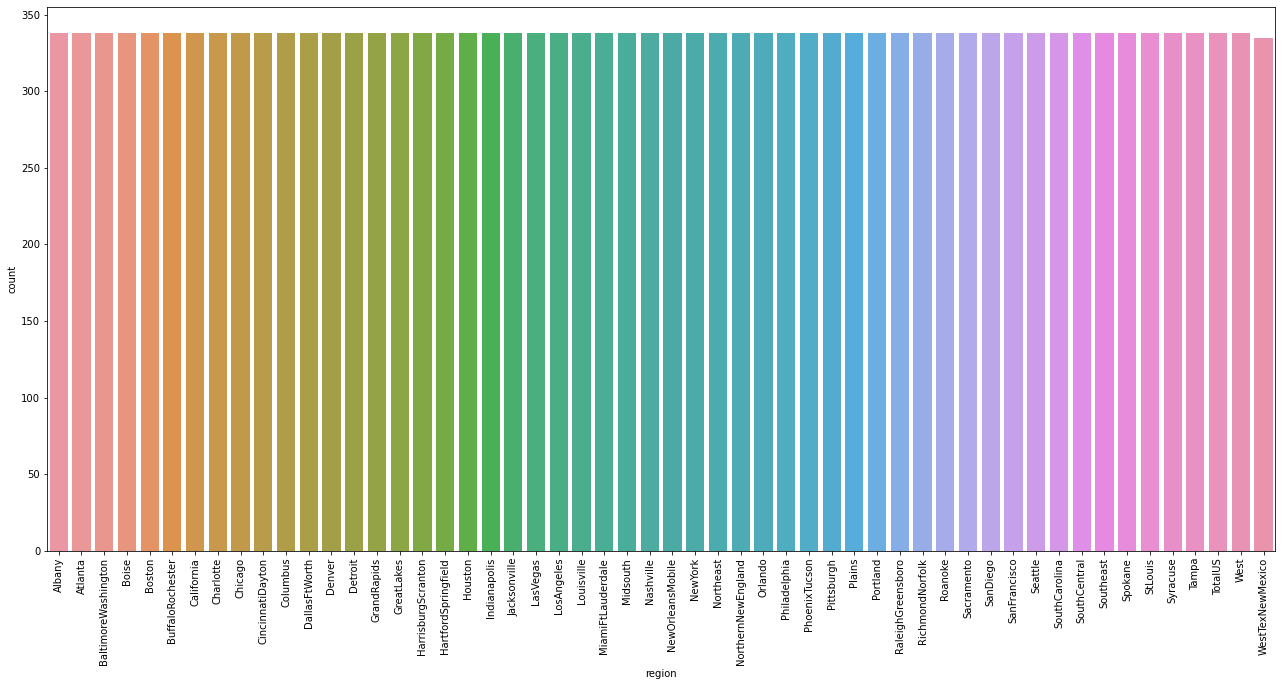

In [22]:
# count plot on single categorical variable
plt.figure(figsize=(22,10))
count1=sns.countplot(df['region'])
count1.set_xticklabels(count1.get_xticklabels(), rotation=90)

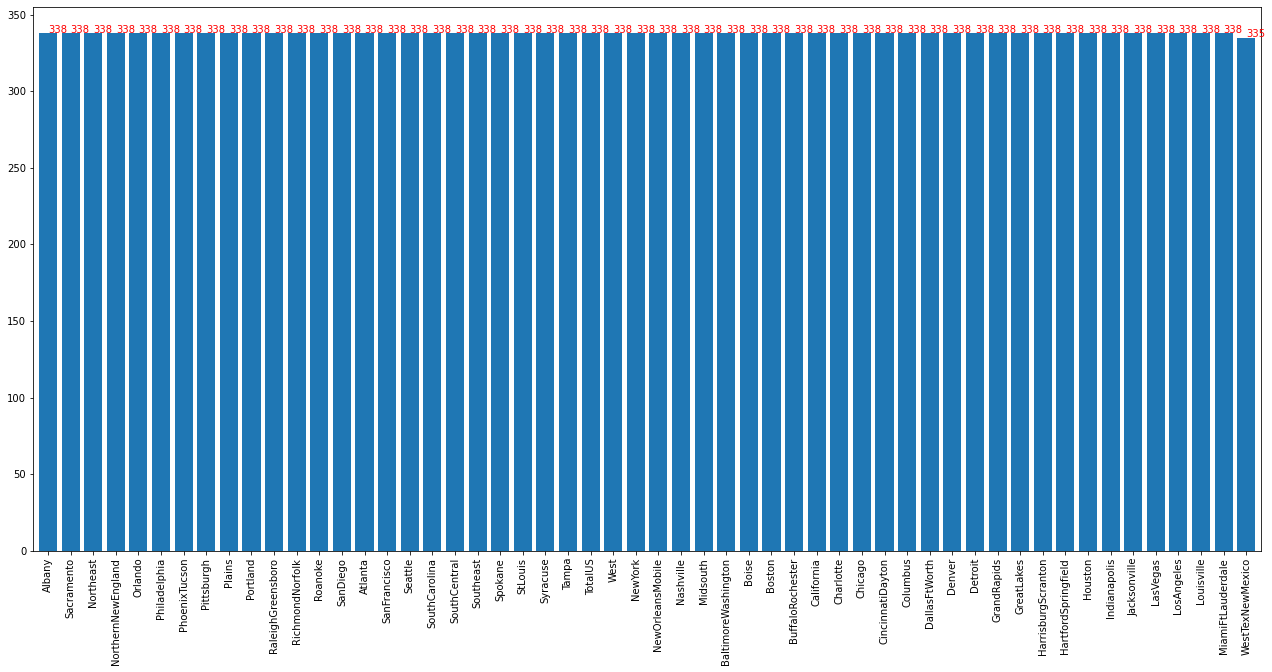

In [23]:
plt.figure(figsize=(22,10))
s = df['region'].value_counts()
ax=s.plot.bar(width=.8) 
for i, v in s.reset_index().iterrows():
    ax.text(i, v.region + 0.2 , v.region, color='red')
plt.show()

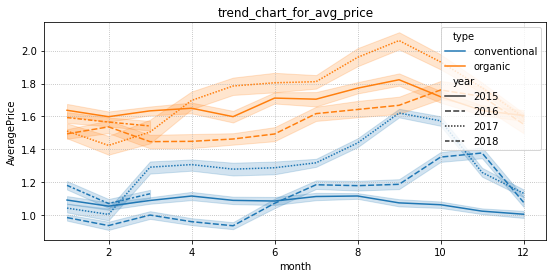

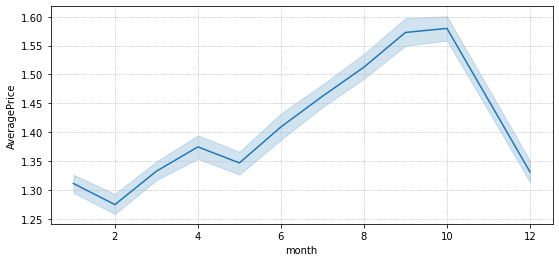

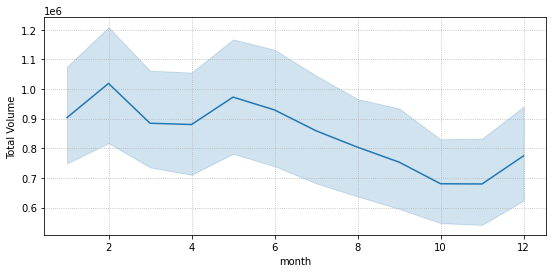

In [24]:
#  Now we are going to check that how 'Average Price' going to swing over the period of time

from matplotlib import rcParams
rcParams['figure.figsize']= 9,4
sns.lineplot(x = 'month', y = 'AveragePrice', data =df2, hue = 'type',style='year')
plt.grid(True, linestyle=':')
plt.title('trend_chart_for_avg_price')
plt.show()
from matplotlib import rcParams
rcParams['figure.figsize']= 9,4
sns.lineplot(x = 'month', y = 'AveragePrice', data =df2)
plt.grid(True, linestyle=':')
plt.show()
from matplotlib import rcParams
rcParams['figure.figsize']= 9,4
sns.lineplot(x = 'month', y = 'Total Volume', data =df2)
plt.grid(True, linestyle=':')
plt.show()

# Removing the Outliers by using Zscore method

In [25]:
# Zscore 
from scipy.stats import zscore

z_score= zscore(df2 [['Total Volume', '4046', '4225', '4770', 'Total Bags','Small Bags','Large Bags','XLarge Bags']])

abs_z_score= np.abs(z_score) 
filtering_entry = (abs_z_score < 1.0).all(axis=1)
df1=df2[filtering_entry]



In [26]:
df1.shape

(16606, 13)

In [27]:
df2.shape

(18249, 13)

In [28]:
df.shape

(18249, 15)

In [29]:
data_loss = ((18249-16606)/18249)*100  
data_loss

9.003233053865966

In [31]:
df1.skew()

AveragePrice    0.527121
Total Volume    2.903840
4046            3.752817
4225            3.440422
4770            4.997471
Total Bags      3.528068
Small Bags      3.900906
Large Bags      3.730972
XLarge Bags     5.304186
year            0.218801
month           0.090430
dtype: float64

In [32]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df1['region']=le.fit_transform(df1['region'])

In [33]:
df1['region'].value_counts()

0     338
23    338
26    338
27    338
1     338
31    338
32    338
34    338
37    338
38    338
39    338
40    338
41    338
42    338
44    338
47    338
48    338
49    338
50    338
24    338
30    338
10    338
16    338
4     338
5     338
7     338
21    338
2     338
3     338
17    338
20    338
19    338
33    337
43    337
9     337
14    335
36    334
53    332
11    330
28    326
35    323
13    318
18    313
12    290
8     279
25    222
22    188
46    181
15    174
52    170
6     169
29    169
45    169
51    157
Name: region, dtype: int64

In [34]:
#creating the dictionary to label item

le.fit(df['region'])
encoded_data=le.transform(df['region'])
label_value_dict=dict(zip(range(len(le.classes_)),le.classes_))

In [35]:
label_value_dict[2]

'BaltimoreWashington'

In [36]:
le=LabelEncoder()
df1['type']=le.fit_transform(df1['type'])

In [37]:
df1['type'].value_counts()

1    9111
0    7495
Name: type, dtype: int64

# Seprating feature and label

In [38]:
fe = df1.drop(columns=['AveragePrice', 'year'], axis=1) 
la = df1.AveragePrice 

# Checking Correlation and multicollinearity


<AxesSubplot:>

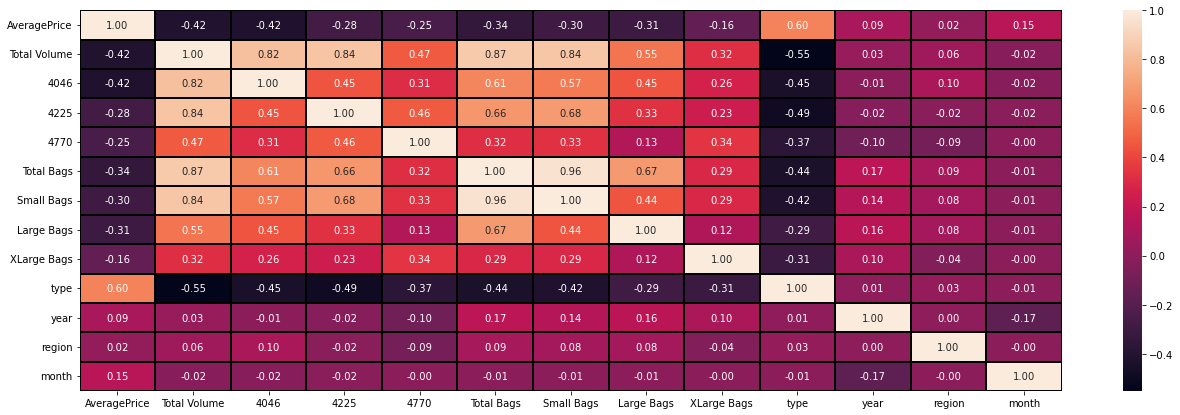

In [39]:

plt.figure(figsize=(22,7)) 
sns.heatmap(df1.corr(),annot=True,linewidths=0.1,linecolor="black",fmt="0.2f")

In [40]:
df1.corr()['AveragePrice'].sort_values()

4046           -0.421471
Total Volume   -0.415698
Total Bags     -0.339765
Large Bags     -0.307575
Small Bags     -0.295680
4225           -0.278299
4770           -0.250191
XLarge Bags    -0.155391
region          0.018523
year            0.092715
month           0.154447
type            0.595436
AveragePrice    1.000000
Name: AveragePrice, dtype: float64

In [43]:
fe.corrwith(la)

Total Volume   -0.415698
4046           -0.421471
4225           -0.278299
4770           -0.250191
Total Bags     -0.339765
Small Bags     -0.295680
Large Bags     -0.307575
XLarge Bags    -0.155391
type            0.595436
region          0.018523
month           0.154447
dtype: float64

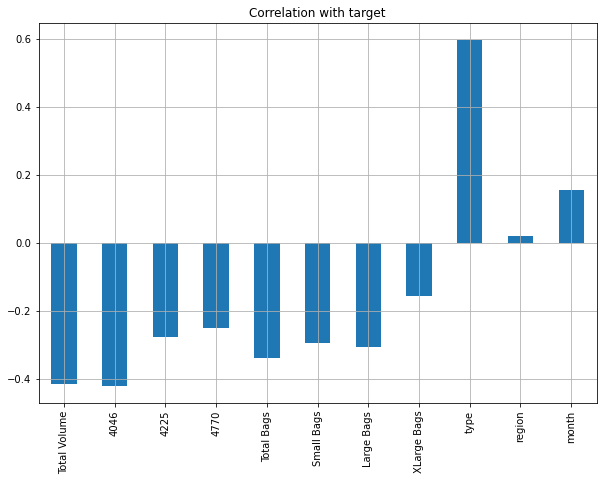

In [44]:
# Correlation with lable by graphical representation


fe.corrwith(la).plot(kind='bar',grid=True,figsize=(10,7),
title='Correlation with target')
plt.show()

# Checking highly correlated features

In [45]:
def correlation(dataset, threshold):
    col_corr = set()  
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: 
                colname = corr_matrix.columns[i]  
                col_corr.add(colname)
    return col_corr

In [46]:
corr_features = correlation(df1, 0.75)
len(set(corr_features))

4

In [47]:
corr_features

{'4046', '4225', 'Small Bags', 'Total Bags'}

In [49]:
f2=fe.drop(labels=corr_features,axis=1)

In [50]:
f2

,Total Volume,4770,Large Bags,XLarge Bags,type,region,month
0,64236.62,48.16,93.25,0.0,0,0,12
1,54876.98,58.33,97.49,0.0,0,0,12
2,118220.22,130.50,103.14,0.0,0,0,12
3,78992.15,72.58,133.76,0.0,0,0,12
4,51039.60,75.78,197.69,0.0,0,0,11
...,...,...,...,...,...,...,...
18244,17074.83,0.00,431.85,0.0,1,53,2
18245,13888.04,0.00,324.80,0.0,1,53,1
18246,13766.76,727.94,42.31,0.0,1,53,1
18247,16205.22,727.01,50.00,0.0,1,53,1


# Checking VIF(Variance Inflation factor)

In [51]:
#Checking for the multicollinearity
# Import library for VIF

from statsmodels.stats.outliers_influence import variance_inflation_factor
def CalculateVIF(Data):
    
 # Calculating VIF

    vif = dict()
    vif["FeatureColumns"] = Data.columns
    vif["VIF"] = [variance_inflation_factor(Data.values, i) for i in range(Data.shape[1])]
    return(pd.DataFrame(vif))

In [52]:
CalculateVIF(f2)

,FeatureColumns,VIF
0,Total Volume,2.857228
1,4770,1.567921
2,Large Bags,1.765153
3,XLarge Bags,1.281259
4,type,2.352789
5,region,3.001453
6,month,2.804284


# Data Scaling Standard Scaler

In [53]:
scalar = StandardScaler()
f_scaled = scalar.fit_transform (f2)

In [54]:
f_scaled.shape

(16606, 7)

# using SelectKBest feature Selection method

In [58]:
from sklearn. feature_selection import SelectKBest, f_regression
best_features = SelectKBest(score_func=f_regression, k=10) 
fit= best_features.fit (fe,la)

df_scores = pd.DataFrame (fit.scores_)
df_columns= pd.DataFrame (fe.columns)

#concatenate dataframes

feature_scores = pd.concat([df_columns, df_scores], axis=1)
feature_scores.columns = ['Feature_Name', 'Score'] 

print (feature_scores.nlargest (10, 'Score')) 

    Feature_Name        Score
8           type  9120.464773
1           4046  3586.610160
0   Total Volume  3468.652357
4     Total Bags  2166.925801
6     Large Bags  1734.906881
5     Small Bags  1590.702374
2           4225  1393.944341
3           4770  1108.741289
7    XLarge Bags   410.844598
10         month   405.746629


In [59]:
best_top_10f=df1[['type','4046','Total Volume','Total Bags','Large Bags','Small Bags','4225','4770','XLarge Bags','month']]

# Split data into train and test

In [60]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [62]:
maxAccu=0
lrm=LinearRegression()
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(f2,la,test_size=0.3,random_state=i)
    lrm = LinearRegression()
    lrm.fit(x_train, y_train)
    pred=lrm.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print(' accuracy =',maxAccu,'on random state',maxRS)


 accuracy = 0.4283014933784728 on random state 133


In [64]:
x_train, x_test, y_train, y_test = train_test_split(f2, la, test_size=0.3, random_state=133)

# Model Building

In [65]:
#linear model

ln=LinearRegression()
ln.fit(x_train,y_train)
predln=ln.predict(x_test)
print('r2 score is :',round((r2_score(y_test,predln)),2))
print('RMSE:',round(np.sqrt(mean_squared_error(y_test,predln)),2))
print('mean absolute error:',round((mean_absolute_error(y_test,predln)),2))

r2 score is : 0.43
RMSE: 0.31
mean absolute error: 0.24


In [66]:
from sklearn.linear_model import Ridge,Lasso,ElasticNet

In [67]:
#lasso model

ls=Lasso(alpha=0.0001)
ls.fit(x_train,y_train)
predls=ls.predict(x_test)
print('r2 score is :',round((r2_score(y_test,predls)),2))
print('RMSE:',round(np.sqrt(mean_squared_error(y_test,predls)),2))
print('mean absolute error:',round((mean_absolute_error(y_test,predls)),2))

r2 score is : 0.43
RMSE: 0.31
mean absolute error: 0.24


In [68]:
#Ridge model

rd=Ridge(alpha=0.001)
rd.fit(x_train,y_train)
predrd=rd.predict(x_test)
print('r2 score is :',round((r2_score(y_test,predrd)),2))
print('RMSE:',round(np.sqrt(mean_squared_error(y_test,predrd)),2))
print('mean absolute error:',round((mean_absolute_error(y_test,predrd)),2))

r2 score is : 0.43
RMSE: 0.31
mean absolute error: 0.24


# Conclusion: So, we can see that we are getting the same r2 score. That means our model has been well trained over the training data.